DFS Traversal: [0, 1, 3, 2]
Execution time: 0.000578 seconds
Current memory usage: 0.00 MB
Peak memory usage: 0.01 MB


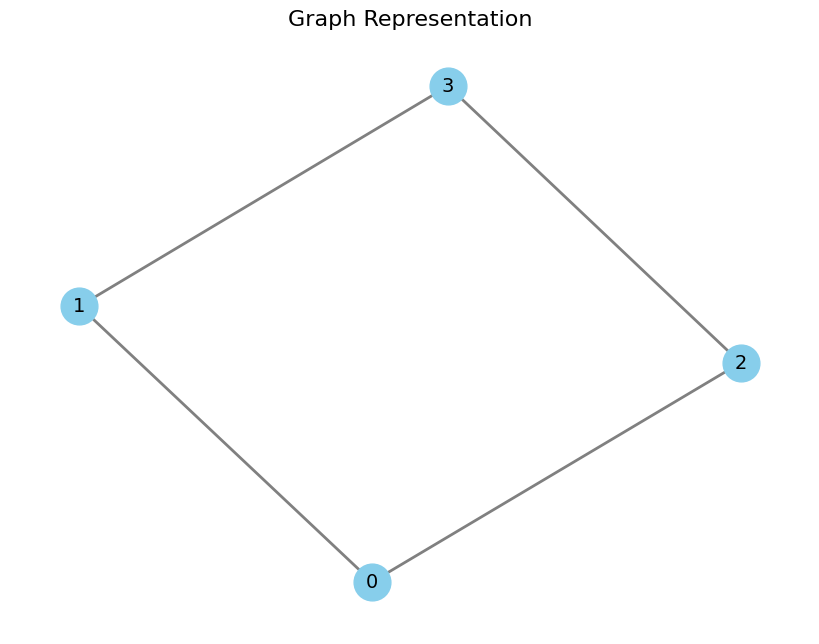

In [1]:
import numpy as np
import time
import tracemalloc
import networkx as nx
import matplotlib.pyplot as plt


def dfs(graph, start):
    """
    Depth-First Search (DFS) algorithm implemented using NumPy.

    Args:
        graph: A NumPy array representing the adjacency matrix of the graph.
        start: The starting node for the DFS traversal.

    Returns:
        A list containing the nodes visited in DFS order.
    """
    visited = np.zeros(graph.shape[0], dtype=bool)
    stack = [start]
    result = []

    while stack:
        node = stack.pop()
        if not visited[node]:
            visited[node] = True
            result.append(node)
            neighbors = np.where(graph[node] == 1)[0]
            for neighbor in reversed(neighbors):
                if not visited[neighbor]:
                    stack.append(neighbor)

    return result


# Example usage
graph = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

start_node = 0

# Measure execution time and memory usage
start_time = time.time()
tracemalloc.start()

# Perform DFS
result = dfs(graph, start_node)

# Stop measuring execution time and memory usage
snapshot = tracemalloc.take_snapshot()
end_time = time.time()
current, peak = tracemalloc.get_traced_memory()

print("DFS Traversal:", result)
print(f"Execution time: {end_time - start_time:.6f} seconds")
print(f"Current memory usage: {current / 10**6:.2f} MB")
print(f"Peak memory usage: {peak / 10**6:.2f} MB")
tracemalloc.stop()

# Plotting the graph
G = nx.Graph()

# Adding edges to the graph based on the adjacency matrix
for i in range(graph.shape[0]):
    for j in range(i + 1, graph.shape[1]):
        if graph[i, j] == 1:
            G.add_edge(i, j)

# Drawing the graph
pos = nx.spring_layout(G)  # Positioning of nodes
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=700, font_size=14, font_color="black", edge_color="gray", width=2)
plt.title("Graph Representation", fontsize=16)
plt.show()